# Assignment 4

u7278803

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/100
4/4 [==============================] - 0s 964us/step - loss: 0.5842
Epoch 2/100
4/4 [==============================] - 0s 346us/step - loss: 0.2332
Epoch 3/100
4/4 [==============================] - 0s 327us/step - loss: 0.0995
Epoch 4/100
4/4 [==============================] - 0s 319us/step - loss: 0.0450
Epoch 5/100
4/4 [==============================] - 0s 296us/step - loss: 0.0338
Epoch 6/100
4/4 [==============================] - 0s 307us/step - loss: 0.0268
Epoch 7/100
4/4 [==============================] - 0s 312us/step - loss: 0.0235
Epoch 8/100
4/4 [==============================] - 0s 280us/step - loss: 0.0208
Epoch 9/100
4/4 [==============================] - 0s 303us/step - loss: 0.0174
Epoch 10/100
4/4 [==============================] - 0s 295us/step - loss: 0.0148
Epoch 11/100
4/4 [==============================] - 0s 854us/step - loss: 0.0138
Epoch 12/100
4/4 [==============================] - 0s 444us/step - loss: 0.0128
Epoch 13/100
4/4 [===================

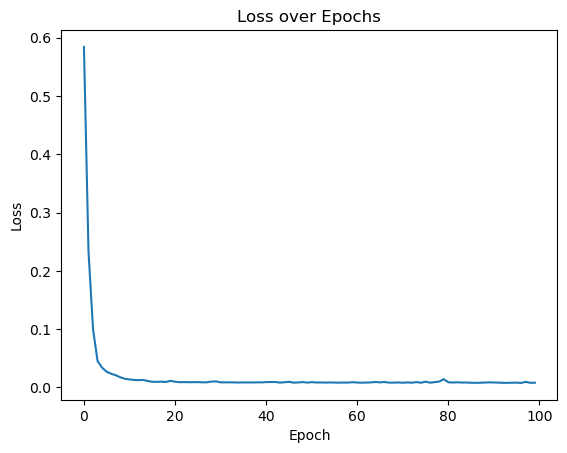

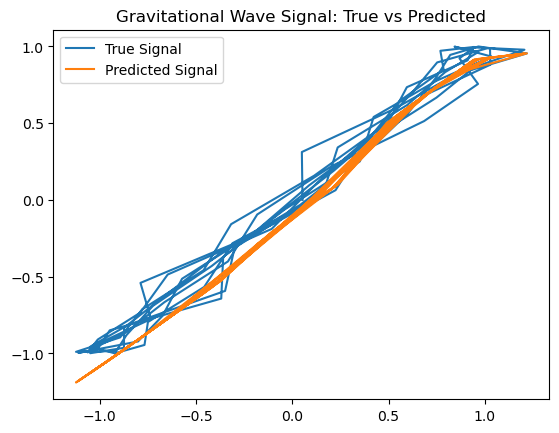

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate noisy gravitational wave-like data
def generate_gw_data(n_samples, noise_level=0.1):
    # Simulating a GW signal with noise
    time = np.linspace(0, 1, n_samples)
    signal = np.sin(2 * np.pi * time * 5)  # Simulated GW signal (sine wave)
    noise = noise_level * np.random.randn(n_samples)  # Adding Gaussian noise
    data = signal + noise
    return data, signal

# Prepare data
n_samples = 100
x_data, y_data = generate_gw_data(n_samples)

# Reshape data for the neural network
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Build the neural network model
model = models.Sequential([
    layers.Dense(5, activation='relu', input_shape=(1,)),  # First hidden layer (5 neurons)
    layers.Dense(5, activation='relu'),                    # Second hidden layer
    layers.Dense(1)                                        # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),  # Learning rate = 0.1
              loss='mean_squared_error')

# Train the model
history = model.fit(x_data, y_data, epochs=100, verbose=1)

# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predict to compare true vs predicted signals
y_pred = model.predict(x_data)

# Plot the noisy data, true signal, and predicted signal
plt.plot(x_data, y_data, label='True Signal')
plt.plot(x_data, y_pred, label='Predicted Signal')
plt.legend()
plt.title('Gravitational Wave Signal: True vs Predicted')
plt.show()

In [9]:
# # Assuming `model` is your trained model and `X_test` is your input data
# predicted_signal = model.predict(X_test)

# # `predicted_signal` will be an array of values representing the predicted amplitudes
# print(predicted_signal)


In [10]:
# import matplotlib.pyplot as plt

# # Assuming `y_true` is the true signal and `predicted_signal` is the predicted signal
# time = range(len(y_true))  # If you have a corresponding time or x-axis variable, replace this

# plt.figure(figsize=(10, 6))

# # Plot the true signal over time
# plt.plot(time, y_true, label="True Signal", color="blue", linewidth=2)

# # Plot the predicted signal over time
# plt.plot(time, predicted_signal, label="Predicted Signal", color="orange", linestyle="dashed")

# plt.xlabel("Time")
# plt.ylabel("Amplitude")
# plt.title("Gravitational Wave Signal: True vs Predicted (Time Series)")
# plt.legend()
# plt.grid(True)
# plt.show()

Epoch 1/100
32/32 [==============================] - 0s 345us/step - loss: 0.1528
Epoch 2/100
32/32 [==============================] - 0s 387us/step - loss: 0.0350
Epoch 3/100
32/32 [==============================] - 0s 292us/step - loss: 0.0339
Epoch 4/100
32/32 [==============================] - 0s 332us/step - loss: 0.0333
Epoch 5/100
32/32 [==============================] - 0s 309us/step - loss: 0.0332
Epoch 6/100
32/32 [==============================] - 0s 282us/step - loss: 0.0328
Epoch 7/100
32/32 [==============================] - 0s 312us/step - loss: 0.0328
Epoch 8/100
32/32 [==============================] - 0s 309us/step - loss: 0.0324
Epoch 9/100
32/32 [==============================] - 0s 313us/step - loss: 0.0321
Epoch 10/100
32/32 [==============================] - 0s 307us/step - loss: 0.0325
Epoch 11/100
32/32 [==============================] - 0s 662us/step - loss: 0.0312
Epoch 12/100
32/32 [==============================] - 0s 291us/step - loss: 0.0311
Epoch 13/100


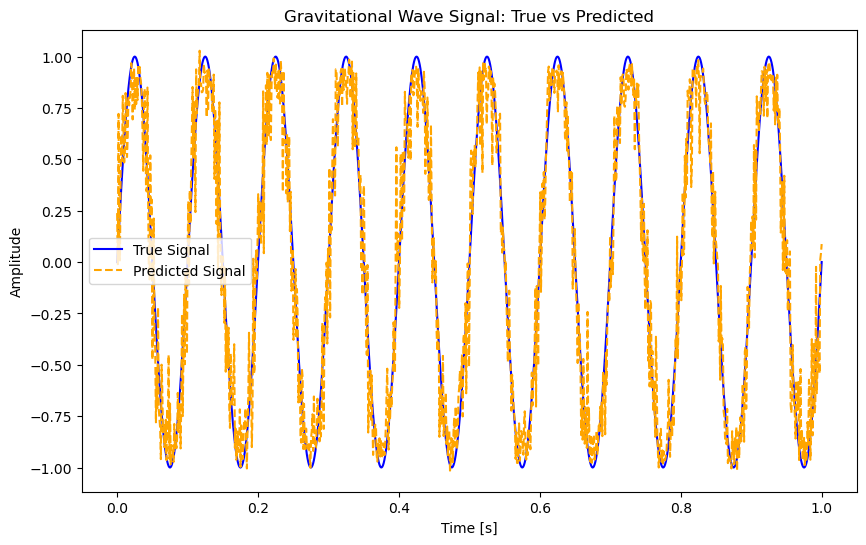

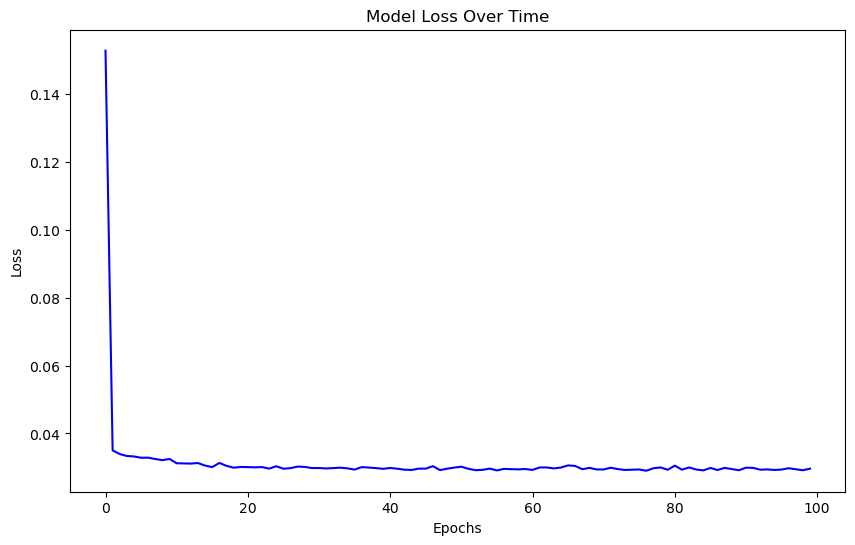

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic Gravitational Wave Data
A = 1   # Amplitude
f = 10  # Frequency in Hz
t = np.linspace(0, 1, 1000)  # Time array, 1 second at 1000 samples/second

# True gravitational wave signal (clean sine wave)
y_true = A * np.sin(2 * np.pi * f * t)

# Add Gaussian noise to simulate a noisy detection
noise = 0.2 * np.random.normal(size=t.shape)
X_test = y_true + noise  # Noisy input signal for testing

# Assuming you have some training data (X_train, y_train)
# In a real scenario, you'll need training data here.
X_train = X_test
y_train = y_true

# Build a simple neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, input_shape=(1,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict on X_test (which is our noisy signal)
predicted_signal = model.predict(X_test)

# Plot the results: True Signal vs Predicted Signal
plt.figure(figsize=(10, 6))

# Plot true signal (y_true) in blue
plt.plot(t, y_true, label="True Signal", color="blue", linestyle="solid")

# Plot predicted signal (output from model) in orange
plt.plot(t, predicted_signal, label="Predicted Signal", color="orange", linestyle="dashed")

# Adding labels and title
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Gravitational Wave Signal: True vs Predicted")
plt.legend()
plt.show()

# Additionally, plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss over Epochs', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Time")
plt.savefig('final_true_vs_predicted_signal.png')  # Save figure

plt.show()


In [13]:
# # Assuming 'noisy_signal' is the new input data for the model
# predicted_signal = model.predict(noisy_signal)

# # Print or save the predicted signal
# # print(predicted_signal)

# # Plot the predicted signal vs the true signal
# plt.figure(figsize=(10, 6))
# plt.plot(t, true_signal, label="True Signal", color="blue")
# plt.plot(t, predicted_signal, label="Predicted Signal", color="orange", linestyle="dashed")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
# plt.title("Gravitational Wave Signal: True vs Predicted (Time Series)")
# plt.legend()
# plt.show()


In [15]:
optimizer_001 = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer_001, loss='mean_squared_error')

# Extract model information (weights, gradients, outputs, and losses)
def extract_model_info(model, x_data, y_data, optimizer):
    info = {"step": [], "weights": [], "gradients": [], "outputs": [], "loss": []}
    
    for step in range(10):  # Run 10 steps of optimization
        with tf.GradientTape() as tape:
            predictions = model(x_data)
            loss_value = model.compiled_loss(y_data, predictions)
        
        # Compute gradients and get weights
        gradients = tape.gradient(loss_value, model.trainable_variables)
        weights = model.trainable_variables
        
        # Apply gradients (this updates the weights)
        optimizer.apply_gradients(zip(gradients, weights))
        
        # Store step information
        info["step"].append(step)
        info["weights"].append([w.numpy() for w in weights])
        info["gradients"].append([g.numpy() for g in gradients])
        info["outputs"].append(predictions.numpy())
        info["loss"].append(loss_value.numpy())
    
    return info

# Create optimizer for the two learning rates
optimizer_01 = tf.keras.optimizers.SGD(learning_rate=0.1)

# Extract information for both learning rates
info_lr_001 = extract_model_info(model, x_data, y_data, optimizer_001)
info_lr_01 = extract_model_info(model, x_data, y_data, optimizer_01)

# Convert extracted information into a table (e.g., using pandas DataFrame)
import pandas as pd

# Convert the information to DataFrames for easy visualization and export
def create_table(info):
    table = pd.DataFrame({
        'Step': info["step"],
        'Loss': info["loss"],
        'Weights': [str(w) for w in info["weights"]],
        'Gradients': [str(g) for g in info["gradients"]],
        'Outputs': [str(o) for o in info["outputs"]]
    })
    return table

# Create tables for both learning rates
table_lr_001 = create_table(info_lr_001)
table_lr_01 = create_table(info_lr_01)

# Save the tables to CSV files
table_lr_001.to_csv('table_lr_001.csv', index=False)
# table_lr_01.to_csv('table_lr_01.csv', index=False)

print("Tables saved successfully!")

# Visualizing the tables
print(table_lr_001.head())
# print(table_lr_01.head())

AttributeError: 'tuple' object has no attribute 'rank'